# Paper plots for MAGIC Paper #1

### Magnetic field and Phi relationship and signage PLOT

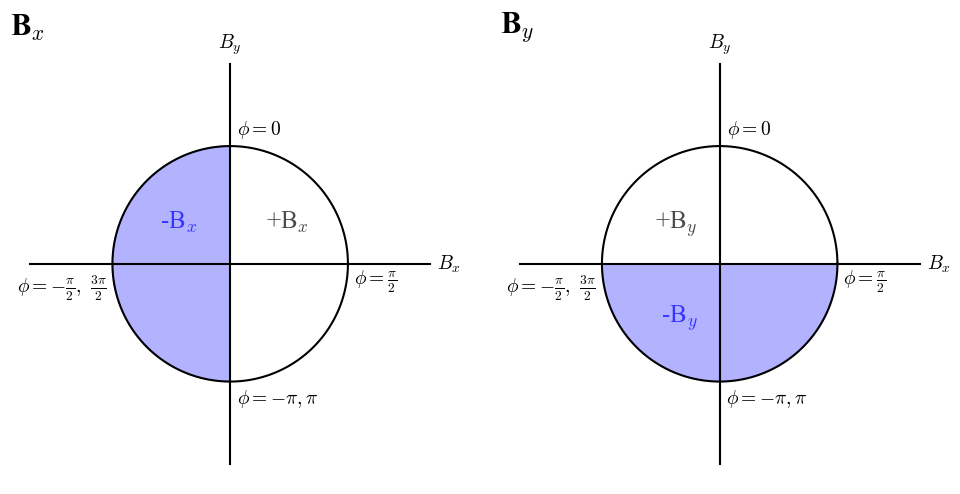

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Set font to Times New Roman
plt.rcParams.update({
    "font.family": "Times New Roman",
    "mathtext.fontset": "cm",   # keep LaTeX math look
    "font.size": 14
})

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Circle setup
theta = np.linspace(0, 2*np.pi, 500)
x = np.cos(theta)
y = np.sin(theta)

axis_extend = 1.7  # how far to extend axes beyond unit circle
label_offset = 0.15  # how far to push text outward

# -------- Left plot (Bx) --------
ax = axs[0]
ax.plot(x, y, color="black")  # circle

# Fill left half of circle
theta_fill = np.linspace(np.pi/2, 3*np.pi/2, 500)
ax.fill(np.cos(theta_fill), np.sin(theta_fill), color="blue", alpha=0.3)

# Extended axes
ax.plot([-axis_extend, axis_extend], [0, 0], color="black")
ax.plot([0, 0], [-axis_extend, axis_extend], color="black")

# Labels (nudged outward with label_offset)
ax.text(1.61 + label_offset, 0, r"$B_x$", va="center", ha="left")
ax.text(0, 1.61 + label_offset, r"$B_y$", ha="center", va="bottom")

ax.text(.25, 0.9 + label_offset, r"$\phi=0$", ha="center", va="bottom")
ax.text(0.9 + label_offset, -0.15, r"$\phi=\frac{\pi}{2}$", va="center", ha="left")
ax.text(0.4, -0.9 - label_offset, r"$\phi=-\pi, \pi$", ha="center", va="top")
ax.text(-0.9 - label_offset, -0.2, r"$\phi=-\frac{\pi}{2}, \ \frac{3\pi}{2}$", va="center", ha="right")

ax.set_title(r"B$_x$", fontsize=22, loc="left", fontweight='bold')

ax.text(-0.6, 0.3, r"-B$_x$", fontsize=18, color = 'blue', alpha = 0.7)
ax.text(0.3, 0.3, r"+B$_x$", fontsize=18, color = 'black', alpha = 0.7)

ax.set_aspect("equal")
ax.axis("off")

# -------- Right plot (By) --------
ax = axs[1]
ax.plot(x, y, color="black")  # circle

# Fill bottom half of circle
theta_fill = np.linspace(np.pi, 2*np.pi, 500)
ax.fill(np.cos(theta_fill), np.sin(theta_fill), color="blue", alpha=0.3)

# Extended axes
ax.plot([-axis_extend, axis_extend], [0, 0], color="black")
ax.plot([0, 0], [-axis_extend, axis_extend], color="black")

# Labels (nudged outward with label_offset)
ax.text(1.61 + label_offset, 0, r"$B_x$", va="center", ha="left")
ax.text(0, 1.61 + label_offset, r"$B_y$", ha="center", va="bottom")

ax.text(.25, 0.9 + label_offset, r"$\phi=0$", ha="center", va="bottom")
ax.text(0.9 + label_offset, -0.15, r"$\phi=\frac{\pi}{2}$", va="center", ha="left")
ax.text(0.4, -0.9 - label_offset, r"$\phi=-\pi, \pi$", ha="center", va="top")
ax.text(-0.9 - label_offset, -0.2, r"$\phi=-\frac{\pi}{2}, \ \frac{3\pi}{2}$", va="center", ha="right")

ax.set_title(r"B$_y$", fontsize=22, loc="left", fontweight='bold')

ax.text(-0.5, -0.5, r"-B$_y$", fontsize=18, color = 'blue', alpha = 0.7)
ax.text(-0.55, 0.3, r"+B$_y$", fontsize=18, color = 'black', alpha = 0.7)

ax.set_aspect("equal")
ax.axis("off")

plt.tight_layout()
plt.savefig('/Users/sophiakressy/Desktop/sign_B.pdf')

### Refinement PLOT

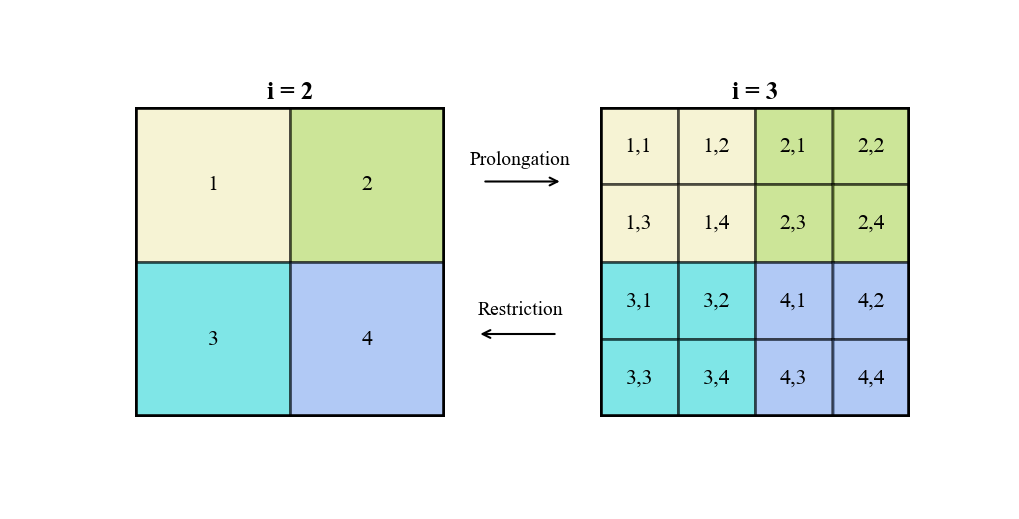

In [140]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_grid(ax, n, labels, title, lthick, colors=None, alpha=0.3):
    step = 1.0 / n
    for i in range(n):
        for j in range(n):
            facecolor = 'none'
            edgecolor = 'black'
            if colors is not None:
                if n == 2:
                    if i == 0 and j == 0: facecolor = colors[0]
                    elif i == 0 and j == 1: facecolor = colors[1]
                    elif i == 1 and j == 0: facecolor = colors[2]
                    else: facecolor = colors[3]
                elif n == 4:
                    if i < 2 and j < 2: facecolor = colors[0]
                    elif i < 2 and j >= 2: facecolor = colors[1]
                    elif i >= 2 and j < 2: facecolor = colors[2]
                    else: facecolor = colors[3]

            rect = patches.Rectangle(
                (j*step, 1-(i+1)*step), step, step,
                linewidth=lthick, edgecolor=edgecolor, facecolor=facecolor, alpha=alpha
            )
            ax.add_patch(rect)
            ax.text(j*step + step/2, 1-(i+0.5)*step, labels[i][j],
                    ha='center', va='center', fontsize=16)

    # Outer black border
    outer = patches.Rectangle((0,0),1,1, linewidth=4, edgecolor='k', facecolor='none')
    ax.add_patch(outer)

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(title, fontsize=18, weight='bold')


# --- Plot grids ---
fig, axs = plt.subplots(1, 2, figsize=(10,5))
plt.subplots_adjust(wspace=0.5)

# Left grid 2x2
labels_2 = [["1","2"], ["3","4"]]
quad_colors = ['palegoldenrod', 'yellowgreen', 'darkturquoise', 'cornflowerblue']
draw_grid(axs[0], 2, labels_2, "i = 2", lthick=2, colors=quad_colors, alpha=0.5)

# Right grid 4x4
labels_3 = [["1,1","1,2","2,1","2,2"],
            ["1,3","1,4","2,3","2,4"],
            ["3,1","3,2","4,1","4,2"],
            ["3,3","3,4","4,3","4,4"]]
draw_grid(axs[1], 4, labels_3, "i = 3", lthick=2, colors=quad_colors, alpha=0.5)

# --- Add text ---
fig.text(0.51, 0.7, "Prolongation", ha="center", va="center", fontsize=14)
fig.text(0.51, 0.4, "Restriction", ha="center", va="center", fontsize=14)

# --- Add arrows using a dedicated invisible axes ---
ax_arrow = fig.add_axes([0,0,1,1], zorder=-1)  # full figure
ax_arrow.axis('off')

# Axes positions
pos0 = axs[0].get_position()
pos1 = axs[1].get_position()
x_center = (pos0.x1 + pos1.x0)/2 + 0.01
arrow_dx = 0.08

# Prolongation arrow: just above the top edge
y_top = max(pos0.y1, pos1.y1) - 0.13
ax_arrow.annotate("", xy=(x_center + arrow_dx/2, y_top),
                  xytext=(x_center - arrow_dx/2, y_top),
                  xycoords='figure fraction', textcoords='figure fraction',
                  arrowprops=dict(arrowstyle="->", lw=1.5))

# Restriction arrow: just below the bottom edge
y_bottom = min(pos0.y0, pos1.y0) + .185
ax_arrow.annotate("", xy=(x_center -0.005 - arrow_dx/2, y_bottom),
                  xytext=(x_center -0.005 + arrow_dx/2, y_bottom),
                  xycoords='figure fraction', textcoords='figure fraction',
                  arrowprops=dict(arrowstyle="->", lw=1.5))

plt.savefig('/Users/sophiakressy/Desktop/restriction_fig.pdf')